# Logistic Regression

`Logistic Regression` is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes). The goal of logistic regression is to find the best fitting model to describe the relationship between the dichotomous characteristic of interest (dependent variable) and a set of independent (predictor or explanatory) variables.

or 

`Logistic regression`  is a `classification` algorithm used to assign observations to a discrete set of classes. Unlike linear regression
which outputs continuous number values, logistic regression transforms its output using the `logistic sigmoid function` to return
a probability value which can then be mapped to two or more discrete classes.

Logistic Regression can be used for:
1. Binary Classification
2. Multi-class Classification
3. One-vs-Rest Classification

## Assumptions of Logistic regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers
4. There should be no high correlations among the independent variables. This can be checked using a correlation matrix.

In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


In [11]:
# data import
df = sns.load_dataset('titanic')
df.head()   

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# data preprocessing
df.drop('deck', axis=1, inplace=True)

# impute missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# impute missing values in embarked and embark_town
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# encode the categorical variables using for loop
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object' or df[i].dtypes == 'category':
        df[i] = le.fit_transform(df[i])
        
df.head()


C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_18964\4220022829.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Sumit Sharma\AppData\Local\Temp\ipykernel_18964\4220022829.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [13]:
# X and y columns
X = df.drop("survived", axis=1)
y = df['survived']

In [14]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [15]:
# call the model
model = LogisticRegression()

In [16]:
# fit the model
model.fit(X_train, y_train)

c:\Users\Sumit Sharma\.conda\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# predict the model
y_pred = model.predict(X_test)

In [18]:
# evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
[[116   0]
 [  0  63]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00        63

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



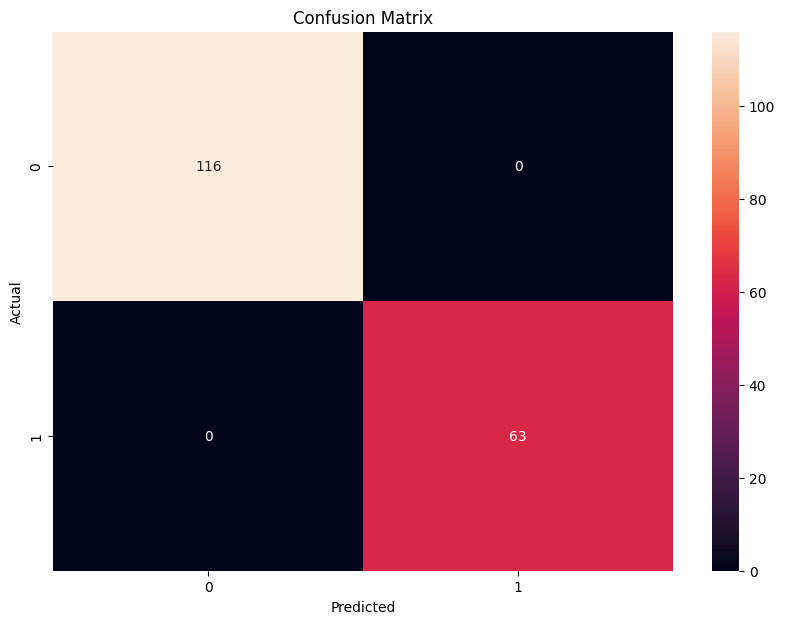

In [20]:
# plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# save the model
import pickle
pickle.dump(model, open('./Save_models/02_model_logistic_regression.pkl', 'wb'))
print("Model Saved Successfully")

Model Saved Successfully
